In [19]:
import os
import sys
import json

import rasterio
import numpy as np
import matplotlib.pyplot as plt
import rvt

In [20]:
# compute absolute path to the project root's src/
sys.path.insert(0, os.path.join(os.getcwd(), "src"))

# import project specific (src/project_utils/...) packages #
from project_utils import config as proj_config
from project_utils import io as proj_io
from project_utils import geo as proj_geo
from project_utils import lidar as proj_lidar
from project_utils import raster as proj_raster
from project_utils import satellite as proj_satellite
from project_utils import vis as proj_vis
from project_utils import scratch as proj_scratch

# auto-reload any module that changes on disk
%load_ext autoreload
%autoreload
# %reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
PATH_TO_CONFIG = "main/config.yml"

config = proj_config.Config(PATH_TO_CONFIG)

In [16]:
path_to_dir = config.get("paths", "processed", "dtm")
files = os.listdir(path_to_dir)
print(files)
print(len(files))

['ANA_A01_2018_LAS_7_new_dtm.tif', 'AND_A01_2013_laz_11_new_dtm.tif', 'AND_A01_2013_laz_1_new_dtm.tif', 'ANA_A01_2018_LAS_8_new_dtm.tif', 'AND_A01_2013_laz_10_new_dtm.tif', 'ANA_A01_2018_LAS_6_new_dtm.tif', 'ANA_A01_2018_LAS_5_new_dtm.tif', 'ANA_A01_2018_LAS_9_new_dtm.tif', 'AND_A01_2013_laz_0_new_dtm.tif']
9


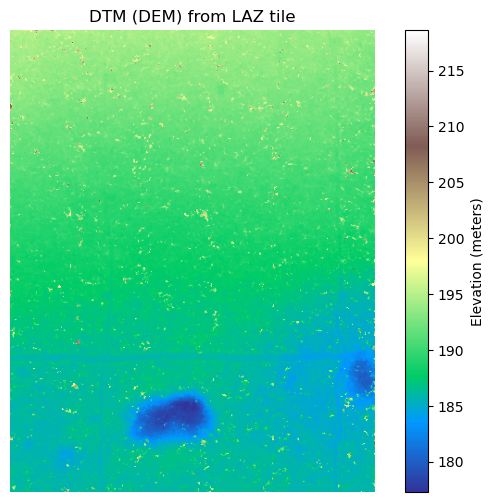

In [17]:
path_to_file = os.path.join(
    path_to_dir,
    files[0]
)

with rasterio.open(path_to_file) as src:
    arr = src.read(1)
    profile = src.profile


plt.figure(figsize=(8,6))
im = plt.imshow(arr, cmap='terrain')
plt.colorbar(im, label='Elevation (meters)')
plt.title("DTM (DEM) from LAZ tile")
plt.axis('off')
plt.show()

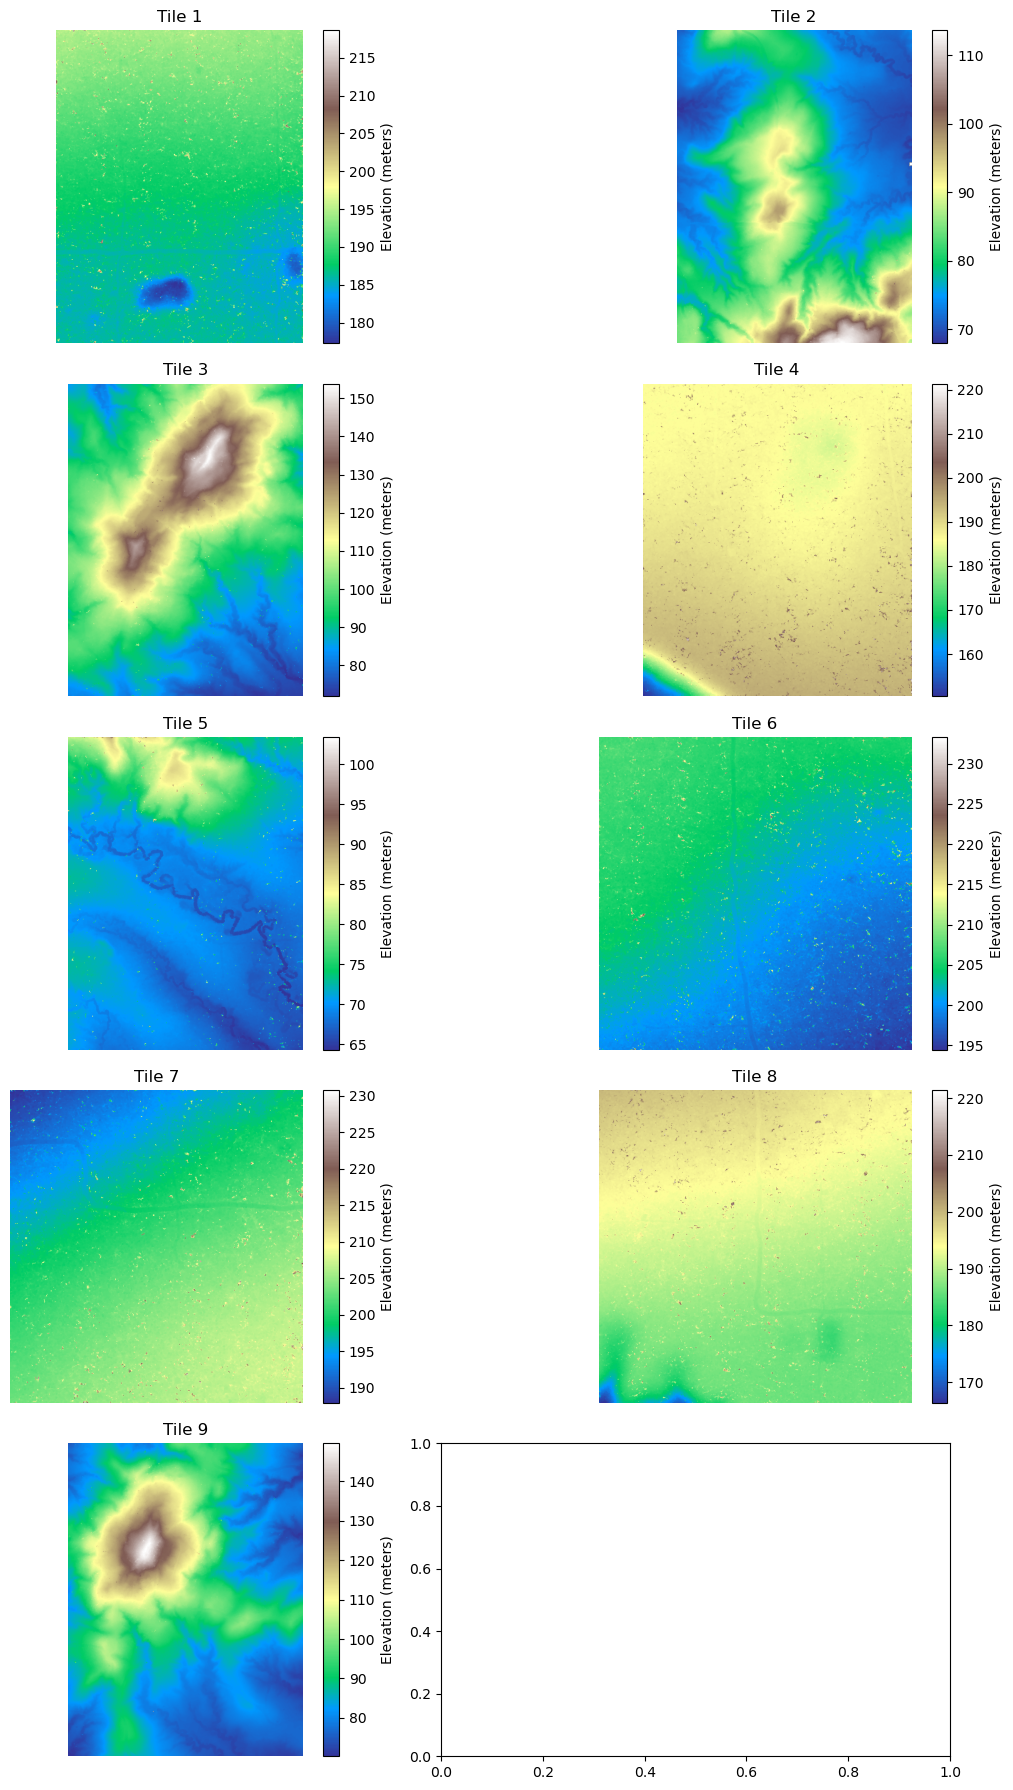

In [18]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))
axes = axes.flatten()  # Makes indexing easier: axes[0], axes[1], ...

for i, file in enumerate(files[:10]):  # Ensure to use only first 10 files
    path_to_file = os.path.join(path_to_dir, file)
    with rasterio.open(path_to_file) as src:
        arr = src.read(1)
    arr = np.where((arr > 0) & (arr < 1000), arr, np.nan)
    im = axes[i].imshow(arr, cmap='terrain')
    axes[i].set_title(f"Tile {i+1}")
    axes[i].axis('off')
    plt.colorbar(im, ax=axes[i], fraction=0.036, pad=0.04, label='Elevation (meters)')

plt.tight_layout()
plt.show()